10_neda_mimfpt_(ML_KNNR)

Engin Abdan

### Libraries

In [137]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import skew
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('classic')

### Data

In [138]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [139]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [140]:
drop_list = ["Unnamed: 0", "Plt_Or_Not","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Flight_Mean
0,20,19,10,16,13,16,17,22,95


### Data infos

In [141]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.000,17.720,3.069,11.000,16.000,17.000,20.000,26.000
Math_Int,100.000,17.750,3.655,10.000,15.000,17.000,19.000,33.000
Spa_Int,100.000,17.810,3.047,10.000,15.750,17.500,20.000,26.000
Mus_Int,100.000,17.860,3.111,10.000,16.000,17.500,20.000,26.000
Nat_Int,100.000,18.160,3.741,10.000,15.750,18.000,20.000,33.000
Body_Int,100.000,17.200,2.670,10.000,15.000,17.000,19.000,23.000
Interp_Int,100.000,17.780,2.866,12.000,16.000,18.000,19.000,26.000
Intrap_Int,100.000,18.070,2.875,13.000,16.000,18.000,20.000,26.000
Flight_Mean,100.000,75.000,12.092,55.000,63.750,75.000,86.000,98.000


### Skewness

In [142]:
x = stu.drop(columns=["Flight_Mean"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [143]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [144]:
#sns.pairplot(stu,hue="Flight_Mean");

### Corr With Plt_Or_Not

<AxesSubplot:>

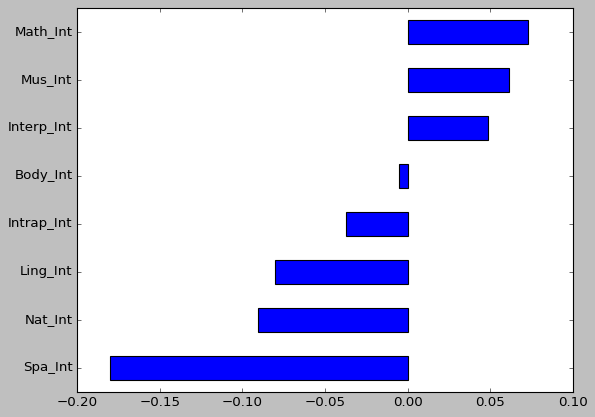

In [145]:
stu.corr()["Flight_Mean"].drop("Flight_Mean").sort_values().plot.barh()

### Train Test Split

In [146]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Flight_Mean"], axis=1)
y = stu["Flight_Mean"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### Scaling

In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### KNNR & Model

In [148]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(x_train_scaled, y_train)

y_test_pred = model.predict(x_test_scaled)
y_train_pred = model.predict(x_train_scaled)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(r2)
print(rmse)

-0.5398315792906112
14.487143725846488


### KNNR & Model & CV

In [149]:
model = KNeighborsRegressor()

scores = cross_validate(model,
                        x_train_scaled,
                        y_train,
                        scoring=['r2', 'neg_root_mean_squared_error'],
                        cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores[["r2", "rmse"]] = df_scores[["test_r2", "test_neg_root_mean_squared_error"]]
df_scores[["r2", "rmse"]]

test_r2                             -0.436
test_neg_root_mean_squared_error   -13.496
dtype: float64
----------------------------------------------------------------


,r2,rmse
0,-0.169,-11.380
1,-0.416,-13.390
2,-0.326,-14.430
3,-0.334,-14.286
4,-0.937,-13.993


### KNNR & Model & Best k

In [150]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    
    knn_model.fit(x_train_scaled, y_train)    
    pred = knn_model.predict(x_test_scaled)
    
    test_error = 1 - r2_score(y_test, pred)
    test_error_rates.append(test_error)

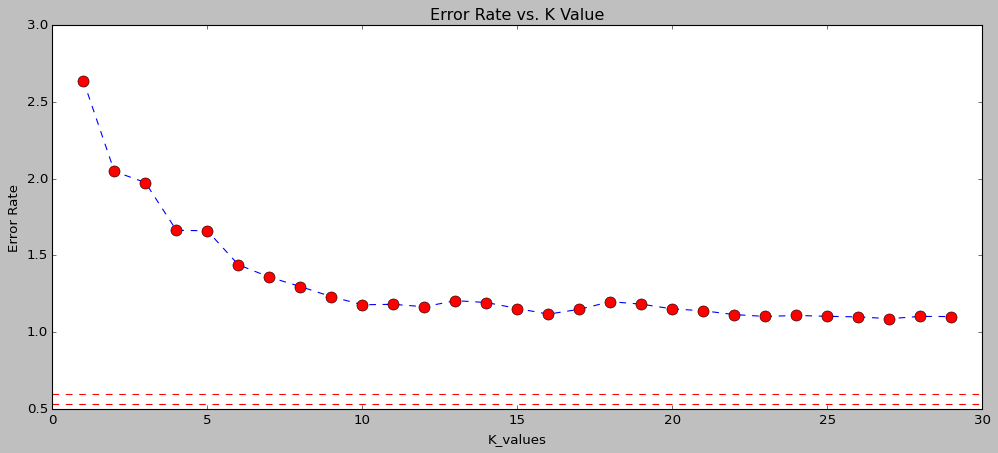

In [151]:
plt.figure(figsize=(15,6))

plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.53, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.60, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### KNNR & Model & Best k & GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)

param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')

knn_grid_model.fit(x_train_scaled, y_train)

knn_grid_model.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

In [153]:
### KNN With k=24
knn = KNeighborsRegressor(n_neighbors=24, p =1, weights="uniform")

knn.fit(x_train_scaled, y_train)
y_test_pred = knn.predict(x_test_scaled)

print('WITH K=24')
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(r2)
print(rmse)

WITH K=24
-0.10896285600545697
12.294324100681283


In [154]:
### KNN With k=4

knn = KNeighborsRegressor(n_neighbors=4, p =1, weights="uniform")

knn.fit(x_train_scaled, y_train)
y_test_pred = knn.predict(x_test_scaled)

print('WITH K=4')
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(r2)
print(rmse)

WITH K=4
-0.6637149565089797
15.058635396343188


### Prediction

In [155]:
knn_scaler = MinMaxScaler()
x_scaled = knn_scaler.fit_transform(x)

In [156]:
final_model = KNeighborsRegressor(n_neighbors=4)
final_model.fit(x, y)

KNeighborsRegressor(n_neighbors=4)

In [157]:
columns_name = x.columns

In [158]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [159]:
pred_data_scaled = knn_scaler.transform(pred_data)
pred_data_scaled

array([[1.6       , 1.13043478, 1.5       , 1.6875    , 0.2173913 ,
        0.53846154, 0.5       , 0.61538462]])

In [160]:
predictions = final_model.predict(pred_data_scaled)[0].astype("int")
predictions

74

In [161]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 74
Result		: Pilot
